<a href="https://colab.research.google.com/github/BuczynskiRafal/pipe_calculations/blob/main/catchment_prototyping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get requires

In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8e20ef27e50002b56ef5011ab5fcdef743c6a47b164bca5c55e5498fddb716da
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
!pip install -U rcg-0.0.3.tar.gz

In [4]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from fuzzy.categories import LandForm, LandCover
from fuzzy.engine import Prototype, engine
from fuzzy.memberships import membership
from fuzzy.rules import SlopeRule
from skfuzzy import control as ctrl
import plotly.graph_objects as go
from numpy.core._multiarray_umath  import  ndarray
from matplotlib import cm

# Create object for prototyping

## Select land use and type form

In [11]:
land_form = LandForm.flats_and_plateaus
land_cover = LandCover.permeable_areas

## Prepare object for calculations

In [12]:
clc = Prototype(land_form=land_form, land_cover=land_cover)

## Get example results

In [13]:
slope = clc.slope_result
impervious = clc.impervious_result
catchment = clc.get_populate(clc.catchment_result)
print(slope)


print(impervious)
print(catchment)


5.088435374149661
10.000000000000002
meadows


In [14]:
result = clc.slope_result

## Plot result

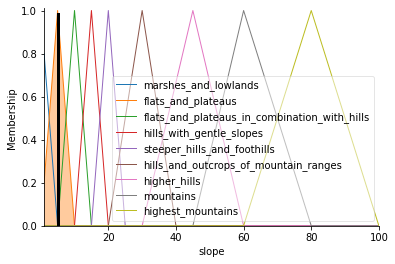

In [15]:
membership.slope.view(sim=engine.slope_simulation)

## Plot universe of slope

In [24]:
# LandUse -> LandForm
# LandForm -> LandCover

# x = land_form_type
# y = land_cover_type

# land_form_type = np.arange(0, 9.1, 1)
# land_cover_type = np.arange(0, 13.1, 1)
land_form_type = np.arange(LandForm.marshes_and_lowlands, LandForm.highest_mountains + 0.1, 1)
land_cover_type = np.arange(LandCover.medium_conditions, LandCover.marshes + 0.1, 1)
land_form_type, land_cover_type = np.meshgrid(land_form_type, land_cover_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_cover_type), len(land_cover_type[1])))

for i in range(1, len(land_form_type[1])):
    for j in range(1, len(land_cover_type)):
        simulate = Prototype(land_form=i, land_cover=j)
        pred_val[j][i] = simulate.slope_result

fig = go.Figure(data=[go.Surface(x=land_form_type, y=land_cover_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])

fig.update_layout(
    title='Slope evaluation using the fuzzy logic model',
    scene=dict(
        xaxis_title='Land form type',
        yaxis_title='Land cover type',
        zaxis_title='Percent of surface slope'
    ),
    autosize=True,
    width=900,
    height=900,
    font=dict(
            size=14,
        )
    )

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

# xticks = [i.lower() for i in X.columns]
# title = 'Weights of variables in the Linear Regression.'
# matplotlib.rcParams['figure.figsize'] = (6.0, 6.0) 
# plt.title(title, loc='center')
# plt.xticks(ticks=np.arange(0, 8, 1), labels=xticks, rotation=45, ha="right")


## Plot universe of impervious

In [27]:
# LandUse -> LandForm
# LandForm -> LandCover

# x = land_form_type
# y = land_cover_type

# land_form_type = np.arange(1, 10.1, 1)
# land_cover_type = np.arange(1, 14.1, 1)
land_form_type = np.arange(LandForm.marshes_and_lowlands, LandForm.highest_mountains + 0.1, 1)
land_cover_type = np.arange(LandCover.medium_conditions, LandCover.marshes + 0.1, 1)
land_form_type, land_cover_type = np.meshgrid(land_form_type, land_cover_type)
pred_val: np.ndarray = np.zeros(shape=(len(land_cover_type), len(land_cover_type[1])))

for i in range(1, len(land_form_type[1])):
    for j in range(1, len(land_cover_type)):
        simulate = Prototype(land_form=i, land_cover=j)
        pred_val[j][i] = simulate.impervious_result

fig = go.Figure(data=[go.Surface(x=land_form_type, y=land_cover_type, z=pred_val,
    contours = {
        "z": {"show": True, "start": 0, "end": 100, "size": 5, "color":"grey"}
    },
    # colorscale=[[0, 'rgb(100,0,255)'], [1, 'rgb(255,0,0)']],
    )])
fig.update_layout(title='Impervious evaluation using the fuzzy logic model',
                  scene=dict(
                      xaxis_title='Land form type',
                      yaxis_title='Land cover type',
                      zaxis_title='Percent of impervious area'),
                  autosize=True,
                  width=900, height=900,
                    font=dict(
            size=14,
        )
                )
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="black", project_z=True))
fig.show()

# Get category of catchment

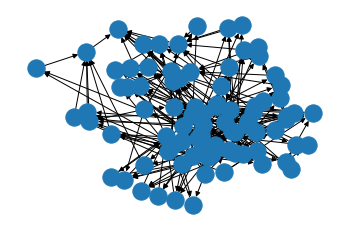

In [ ]:
slope_ctr = engine.slope_simulation_ctrl.view()

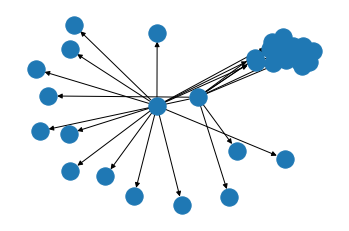

In [ ]:
slope_rules = SlopeRule()
rule_1 = slope_rules.rule1.view()